In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data_path = 'C:/Users/paula/Downloads/formula1gp.zip/GrandPrix_drivers_details_1950_to_2022.csv'

In [12]:
data = pd.read_csv("C:/Users/paula/Downloads/formula1gp/GrandPrix_drivers_details_1950_to_2022.csv")

In [13]:
data.head()

,Pos,Driver,Nationality,Car,PTS,year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950


In [14]:
print("Summary statistics:")
print(data.describe())

Summary statistics:
               PTS         year
count  1618.000000  1618.000000
mean     29.898331  1986.158220
std      58.039108    21.307326
min       0.000000  1950.000000
25%       3.000000  1967.000000
50%       9.000000  1986.000000
75%      30.375000  2005.000000
max     454.000000  2022.000000


In [15]:
print("\nData types and null values:")
print(data.info())


Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pos          1618 non-null   object 
 1   Driver       1618 non-null   object 
 2   Nationality  1618 non-null   object 
 3   Car          1607 non-null   object 
 4   PTS          1618 non-null   float64
 5   year         1618 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 76.0+ KB
None


In [16]:
data = data.dropna()

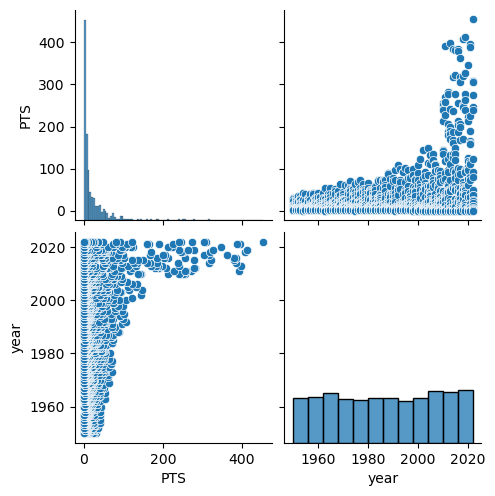

In [17]:
sns.pairplot(data)
plt.show()

In [18]:
X = data[['Driver']]

In [19]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
y = data['PTS']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("\nExperiment 1: Linear Regression")
model = LinearRegression()
model.fit(X_train, y_train)


Experiment 1: Linear Regression


LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 1023158779075720.2
R-squared (R2): -3.129431941421142e+26


In [27]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                                   Coefficient
Driver_Aguri Suzuki SUZ          -1.172634e+01
Driver_Alain Prost PRO            5.148490e+01
Driver_Alan  Jones JON            2.197391e+01
Driver_Alan Brown BRO            -1.505459e+15
Driver_Alberto Ascari ASC         1.216775e+01
...                                        ...
Driver_Yuji Ide IDE              -1.887379e-15
Driver_Yuki Tsunoda TSU           1.773438e+01
Driver_Yves Giraud Cabantous CAB -1.177344e+01
Driver_Zhou Guanyu ZHO           -8.250000e+00
Driver_Zsolt Baumgartner BAU      0.000000e+00

[391 rows x 1 columns]


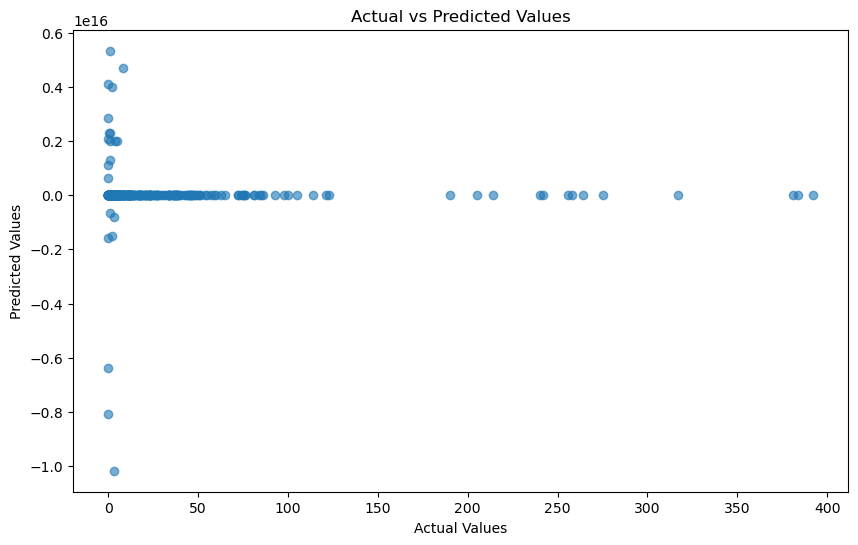

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [29]:
print("\nExperiment 2: Ridge Regression")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Experiment 2: Ridge Regression


Ridge()

In [30]:
y_pred_ridge = ridge_model.predict(X_test)

In [31]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

In [32]:
print(f"Root Mean Squared Error (RMSE) - Ridge: {rmse_ridge}")
print(f"R-squared (R2) - Ridge: {r2_ridge}")

Root Mean Squared Error (RMSE) - Ridge: 39.12600386211427
R-squared (R2) - Ridge: 0.5423742771334228


In [33]:
ridge_coefficients = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficient'])
print("\nRidge Model Coefficients:")
print(ridge_coefficients)


Ridge Model Coefficients:
                                  Coefficient
Driver_Aguri Suzuki SUZ            -11.963867
Driver_Alain Prost PRO              42.974718
Driver_Alan  Jones JON               9.105208
Driver_Alan Brown BRO                0.000000
Driver_Alberto Ascari ASC            6.405208
...                                       ...
Driver_Yuji Ide IDE                  0.000000
Driver_Yuki Tsunoda TSU              6.690755
Driver_Yves Giraud Cabantous CAB   -10.745660
Driver_Zhou Guanyu ZHO              -6.309245
Driver_Zsolt Baumgartner BAU         0.000000

[391 rows x 1 columns]


In [34]:
print("\nExperiment 3: Lasso Regression")
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


Experiment 3: Lasso Regression


Lasso(alpha=0.1)

In [35]:
y_pred_lasso = lasso_model.predict(X_test)

In [36]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

In [37]:
print(f"Root Mean Squared Error (RMSE) - Lasso: {rmse_lasso}")
print(f"R-squared (R2): {r2_lasso}")

Root Mean Squared Error (RMSE) - Lasso: 39.62390004827892
R-squared (R2): 0.5306531797793379


In [38]:
lasso_coefficients = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Coefficient'])
print("\nLasso Model Coefficients:")
print(lasso_coefficients)


Lasso Model Coefficients:
                                  Coefficient
Driver_Aguri Suzuki SUZ             -0.000000
Driver_Alain Prost PRO              38.099333
Driver_Alan  Jones JON               0.000000
Driver_Alan Brown BRO                0.000000
Driver_Alberto Ascari ASC            0.000000
...                                       ...
Driver_Yuji Ide IDE                  0.000000
Driver_Yuki Tsunoda TSU              0.000000
Driver_Yves Giraud Cabantous CAB    -0.000000
Driver_Zhou Guanyu ZHO              -0.000000
Driver_Zsolt Baumgartner BAU         0.000000

[391 rows x 1 columns]


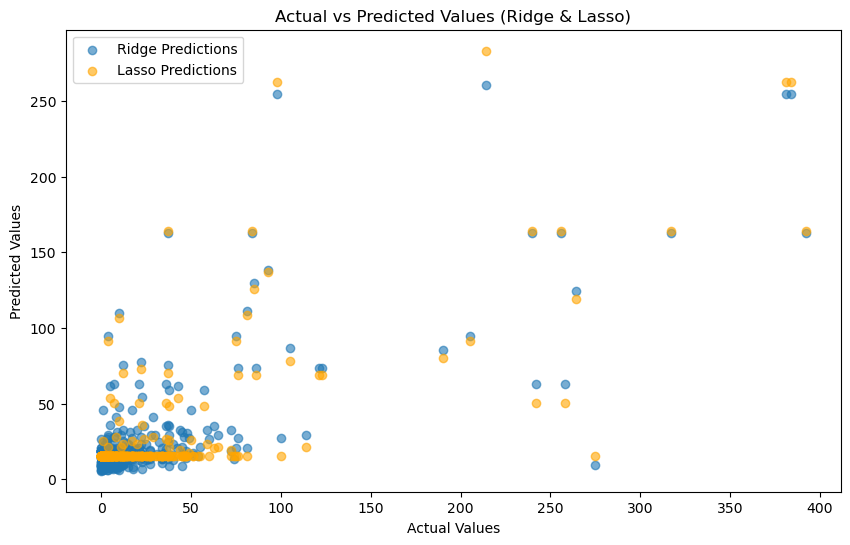

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label='Ridge Predictions')
plt.scatter(y_test, y_pred_lasso, alpha=0.6, label='Lasso Predictions', color='orange')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge & Lasso)')
plt.legend()
plt.show()